# Clustering

Clustering is an **unsupervised learning** technique used to group similar data points into clusters without predefined labels. The key steps involved are:

### 1. Data Preparation
- **Clean and Normalize** the data.
- **Select Features** that best capture the similarities between points.

### 2. Algorithm Selection
- Choose a clustering algorithm such as:
  - **K-Means**: Divides data into _K_ clusters.
  - **Hierarchical Clustering**: Creates a hierarchy of clusters.
  - **DBSCAN**: Finds clusters based on data density, identifying outliers.

### 3. Distance Measure
- Define a measure for similarity between data points:
  - **Euclidean Distance**
  - **Cosine Similarity**

### 4. Execution
- Run the algorithm to **assign points to clusters** and **iterate** until convergence.

### 5. Evaluation
- Use methods like:
  - **Elbow Method**: To determine the optimal number of clusters.
  - **Silhouette Score**: To measure the quality of clustering.

### 6. Interpretation
- Analyze each cluster to gain insights into the patterns in the data.

### Applications
- **Customer segmentation**, **image processing**, and **pattern discovery**.


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [90]:
df=pd.read_csv('../../Datasets/class_exercise/snsdata1.csv')
df

,grad year,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2022,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2022,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2022,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,2022,F,18.240,28,0,0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4562,2022,F,18.628,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4563,2022,F,18.987,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4564,2022,F,18.861,46,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4566 entries, 0 to 4565
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   grad year     4566 non-null   int64  
 1   gender        4131 non-null   object 
 2   age           3840 non-null   float64
 3   friends       4566 non-null   int64  
 4   basketball    4566 non-null   int64  
 5   football      4566 non-null   int64  
 6   soccer        4566 non-null   int64  
 7   softball      4566 non-null   int64  
 8   volleyball    4566 non-null   int64  
 9   swimming      4566 non-null   int64  
 10  cheerleading  4566 non-null   int64  
 11  baseball      4566 non-null   int64  
 12  tennis        4566 non-null   int64  
 13  sports        4566 non-null   int64  
 14  cute          4566 non-null   int64  
 15  sex           4566 non-null   int64  
 16  sexy          4566 non-null   int64  
 17  hot           4566 non-null   int64  
 18  kissed        4566 non-null 

In [92]:
df["gender"].value_counts(dropna=False)

gender
F      3171
M       960
NaN     435
Name: count, dtype: int64

In [93]:
df["gender"].fillna("Unknown",inplace=True)

In [94]:
df["gender"].value_counts(dropna=False)

gender
F          3171
M           960
Unknown     435
Name: count, dtype: int64

In [95]:
df["grad year"].value_counts()

grad year
2022    4566
Name: count, dtype: int64

In [96]:
df.drop("grad year",axis=1,inplace=True)

In [97]:
df["age"].isnull().sum()

726

In [98]:
df["age"].describe(percentiles=[0.01,.02,.03,.04,.05,0.25,0.5,0.75,0.90,.95,.96,.97,.98,.99])

count    3840.000000
mean       19.149429
std         6.388005
min         5.194000
1%         15.520980
2%         17.589480
3%         17.871360
4%         17.982000
5%         18.039850
25%        18.379000
50%        18.678000
75%        18.987750
90%        19.231000
95%        19.433000
96%        19.510000
97%        19.598640
98%        19.830660
99%        20.370490
max       106.927000
Name: age, dtype: float64

In [99]:
df["age"].fillna(df["age"].mean(),inplace=True)  # filling mean at missing points

In [100]:
# df["age"].describe(percentiles=[0.01,.02,.03,.04,.05,0.25,0.5,0.75,0.90,.95,.96,.97,.98,.99])

In [101]:
df["age"]=np.where(df["age"]<16,16,df["age"])
df["age"]=np.where(df["age"]>21,21,df["age"])

In [102]:
df["age"].describe(percentiles=[0.01,.02,.03,.04,.05,0.25,0.5,0.75,0.90,.95,.96,.97,.98,.99])

count    4566.000000
mean       18.759504
std         0.541142
min        16.000000
1%         16.924300
2%         17.725000
3%         17.954850
4%         18.026000
5%         18.073000
25%        18.431000
50%        18.795000
75%        19.149429
90%        19.187000
95%        19.372250
96%        19.455000
97%        19.540150
98%        19.728700
99%        20.149450
max        21.000000
Name: age, dtype: float64

In [103]:
df.describe(percentiles=[0.01,.02,.03,.04,.05,0.25,0.5,0.75,0.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
age,4566.0,18.759504,0.541142,16.0,16.9243,17.725,17.95485,18.026,18.073,18.431,18.795,19.149429,19.187,19.37225,19.455,19.54015,19.7287,20.14945,21.0
friends,4566.0,26.120456,32.065369,0.0,0.0000,0.000,0.00000,0.000,0.000,2.000,16.000,38.000000,65.000,87.00000,93.400,103.00000,118.0000,145.00000,373.0
basketball,4566.0,0.211345,0.759756,0.0,0.0000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,1.000,1.00000,1.000,2.00000,2.0000,3.00000,22.0
football,4566.0,0.228866,0.686250,0.0,0.0000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,1.000,1.00000,2.000,2.00000,2.0000,3.00000,10.0
soccer,4566.0,0.150898,0.699715,0.0,0.0000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,0.000,1.00000,1.000,2.00000,2.0000,3.00000,14.0
softball,4566.0,0.105125,0.596364,0.0,0.0000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,0.000,1.00000,1.000,1.00000,2.0000,3.00000,12.0
volleyball,4566.0,0.091108,0.493573,0.0,0.0000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,0.000,1.00000,1.000,1.00000,1.0000,2.00000,11.0
swimming,4566.0,0.101183,0.399686,0.0,0.0000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,0.000,1.00000,1.000,1.00000,1.0000,2.00000,7.0
cheerleading,4566.0,0.073587,0.440371,0.0,0.0000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,0.000,0.00000,1.000,1.00000,1.0000,2.00000,9.0
baseball,4566.0,0.098774,0.583162,0.0,0.0000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,0.000,1.00000,1.000,1.00000,1.0000,2.00000,16.0


In [104]:
def outlier(x):
  x=x.clip(lower=x.quantile(0.01))
  x=x.clip(upper=x.quantile(0.99))
  return x

In [105]:
num_data=df.select_dtypes(include=np.number)
num_data=num_data.apply(outlier)

In [106]:
num_data.describe(percentiles=[0.01,.02,.03,.04,.05,0.25,0.5,0.75,0.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
age,4566.0,18.761127,0.476683,16.9243,16.924755,17.725,17.95485,18.026,18.073,18.431,18.795,19.149429,19.187,19.37225,19.455,19.54015,19.7287,20.143308,20.14945
friends,4566.0,25.699956,29.684330,0.0000,0.000000,0.000,0.00000,0.000,0.000,2.000,16.000,38.000000,65.000,87.00000,93.400,103.00000,118.0000,145.000000,145.00000
basketball,4566.0,0.189663,0.550167,0.0000,0.000000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,1.000,1.00000,1.000,2.00000,2.0000,3.000000,3.00000
football,4566.0,0.213754,0.583710,0.0000,0.000000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,1.000,1.00000,2.000,2.00000,2.0000,3.000000,3.00000
soccer,4566.0,0.125931,0.497659,0.0000,0.000000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,0.000,1.00000,1.000,2.00000,2.0000,3.000000,3.00000
softball,4566.0,0.087385,0.411801,0.0000,0.000000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,0.000,1.00000,1.000,1.00000,2.0000,3.000000,3.00000
volleyball,4566.0,0.072492,0.321894,0.0000,0.000000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,0.000,1.00000,1.000,1.00000,1.0000,2.000000,2.00000
swimming,4566.0,0.093955,0.335779,0.0000,0.000000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,0.000,1.00000,1.000,1.00000,1.0000,2.000000,2.00000
cheerleading,4566.0,0.058038,0.291395,0.0000,0.000000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,0.000,0.00000,1.000,1.00000,1.0000,2.000000,2.00000
baseball,4566.0,0.073806,0.316791,0.0000,0.000000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,0.000,1.00000,1.000,1.00000,1.0000,2.000000,2.00000


In [107]:
num_data.columns

Index(['age', 'friends', 'basketball', 'football', 'soccer', 'softball',
       'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis',
       'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band',
       'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair',
       'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister',
       'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [108]:
X=num_data[['basketball', 'football', 'soccer', 'softball',
       'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis',
       'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band',
       'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair',
       'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister',
       'abercrombie', 'die', 'death', 'drunk', 'drugs']]

In [109]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [110]:
std=StandardScaler().fit(X)
X_std=pd.DataFrame(std.transform(X), columns=X.columns)

In [111]:
km=KMeans(n_clusters=3,random_state=100)
km.fit(X)

KMeans(n_clusters=3, random_state=100)

In [112]:
km.inertia_

35121.59475849671

In [113]:
km.cluster_centers_[0]

array([0.24008574, 0.29903537, 0.17041801, 0.09003215, 0.08145766,
       0.1607717 , 0.07073955, 0.09539121, 0.06752412, 0.15755627,
       0.50696677, 0.40836013, 0.14790997, 0.113612  , 0.18113612,
       0.73633441, 0.67524116, 0.07824223, 2.0943194 , 0.32690247,
       0.34190782, 0.3301179 , 0.10289389, 0.01822079, 0.88210075,
       0.25401929, 0.09003215, 0.30439443, 0.48338692, 0.2357985 ,
       0.04394427, 0.03965702, 0.22722401, 0.15755627, 0.15326902,
       0.09646302])

In [114]:
X_std.columns

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [115]:
km.labels_

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

In [116]:
df_copy=df.copy()

In [117]:
df_copy["cluster"]=km.labels_  # adding clusters to origional data set

In [118]:
df_copy.head(20)

,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,M,18.982000,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,F,18.801000,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,M,18.335000,69,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,F,18.875000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Unknown,18.995000,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0
5,F,19.149429,142,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6,F,18.930000,72,0,0,0,0,0,0,0,...,2,0,0,2,0,0,0,0,0,1
7,M,18.322000,17,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,F,19.055000,52,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,F,18.708000,39,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2


In [119]:
df_copy["cluster"].value_counts()

cluster
1    3255
0     933
2     378
Name: count, dtype: int64

In [120]:
num=df_copy.select_dtypes(include=np.number)

In [121]:
clust_summary=num.groupby("cluster").mean().T.reset_index()
clust_summary.columns=["Features", "cluster0", "clutser1", "cluster2"]
clust_summary


,Features,cluster0,clutser1,cluster2
0,age,18.713636,18.770654,18.776697
1,friends,28.362272,24.711828,32.716931
2,basketball,0.259378,0.180338,0.359788
3,football,0.319400,0.186790,0.367725
4,soccer,0.217578,0.128111,0.182540
5,softball,0.092176,0.107220,0.119048
6,volleyball,0.110397,0.082642,0.116402
7,swimming,0.175777,0.082949,0.074074
8,cheerleading,0.092176,0.067896,0.076720
9,baseball,0.112540,0.088172,0.156085


In [122]:
overall=num.describe().T["mean"].reset_index()
overall.columns=["Features", "overall"]
overall

,Features,overall
0,age,18.759504
1,friends,26.120456
2,basketball,0.211345
3,football,0.228866
4,soccer,0.150898
5,softball,0.105125
6,volleyball,0.091108
7,swimming,0.101183
8,cheerleading,0.073587
9,baseball,0.098774


In [123]:
final_summary=pd.merge(overall, clust_summary, on="Features", how="inner")
final_summary.to_excel("cluster_summary0.xlsx")

In [124]:
# ELbow curve to get no of cluster
wcss=[]
no_clusters=[]
for i in range(2, 21):
  km=KMeans(n_clusters=i, random_state=100)
  km.fit(X)
  wcss.append(km.inertia_)
  no_clusters.append(i)
  print("Cluster:", i, "WCSS:", km.inertia_)

Cluster: 2 WCSS: 37644.81265862965
Cluster: 3 WCSS: 35121.59475849671
Cluster: 4 WCSS: 33070.35501550515
Cluster: 5 WCSS: 31381.20714835152
Cluster: 6 WCSS: 29764.18325501882
Cluster: 7 WCSS: 28716.493646392686
Cluster: 8 WCSS: 27869.82437749437
Cluster: 9 WCSS: 27225.82330563257
Cluster: 10 WCSS: 26315.76675540713
Cluster: 11 WCSS: 25744.790872447917
Cluster: 12 WCSS: 25130.18021040944
Cluster: 13 WCSS: 24756.497493475217
Cluster: 14 WCSS: 24242.075779807943
Cluster: 15 WCSS: 23947.434569726447
Cluster: 16 WCSS: 23469.10863578356
Cluster: 17 WCSS: 23022.4798012901
Cluster: 18 WCSS: 22689.966536252177
Cluster: 19 WCSS: 22568.75236845686
Cluster: 20 WCSS: 22424.750231948557


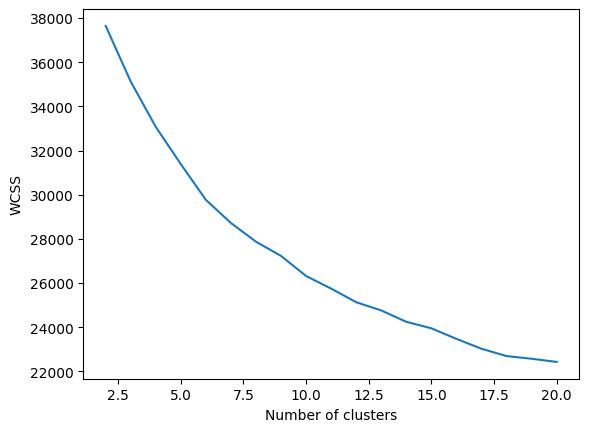

In [125]:
plt.plot(no_clusters, wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [126]:
# silhaoutte score
from sklearn.metrics import silhouette_score

In [127]:
# Based on Elbow curve , we are creating 6 clusters

In [128]:
km6=KMeans(n_clusters=6, random_state=100)
km6.fit(X)

KMeans(n_clusters=6, random_state=100)

In [129]:
df_copy=df.copy()
df_copy["cluster"]=km6.labels_

In [130]:
df_copy["cluster"].value_counts()

cluster
5    3101
2     519
1     298
3     230
0     210
4     208
Name: count, dtype: int64

In [131]:
num=df_copy.select_dtypes(include=np.number)

In [132]:
clust_summary=num.groupby("cluster").mean().T.reset_index()
clust_summary.columns=["Features", "cluster0", "clutser1", "cluster2", "cluster3", "cluster4", "cluster5"]
# clust_summary

In [133]:
a=df_copy.describe().T["mean"].reset_index()
a.columns=["Features", "overall"]
# a

In [134]:
final_6=pd.merge(a, clust_summary, on="Features", how="inner")
final_6.to_excel("cluster_summary6.xlsx")